In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Make a reference to the comic_books_expanded.csv file path
csv_path = "Esophageal Delim.csv"

# Import the comic_books_expanded.csv file as a DataFrame
books_df = pd.read_csv(csv_path, encoding="utf-8")
# Check the special characters imported correctly
books_df

,DATEDX,Age,Education,Sex,Region,Mstatus,Alcohol,Khat,Tobacco,Comorbidity,...,Chemotherapy,Chemo_type,Chemo_cycle,Radiotherapy,Radio_type,Hospital_stay,FU_last,Status_patient,Date_death,Time_to_death
0,12/14/2010,66,3,1,OROMIA,2,2,2,2,0,...,0.0,,,0.0,,1.0,1/17/2011,2.0,4/23/2011,1.0
1,5/15/2010,66,3,2,ADDIS ABABA,2,2,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/2/2010,62,1,2,ADDIS ABABA,2,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/30/2010,62,1,2,OROMIA,2,1,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4/15/2010,45,4,1,OROMIA,2,2,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2/6/2016,55,3,2,OROMIA,2,2,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,2/9/2016,45,2,1,SNNPR,2,2,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,2/10/2016,67,2,2,ADDIS ABABA,2,2,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,3/21/2016,32,2,1,OROMIA,2,2,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "ISBN", "Title", "Other titles", "Name", "All names", 
# "Country of publication", "Place of publication", "Publisher", "Date of publication"
reduced_df = books_df[["DATEDX", "Age", "Sex", "Region", "Alcohol", 
                       "Khat", "Tobacco", "Weight_loss", "Duration_all",
                       "Endoscopy", "CT_Scan", "Hist_grade", "Dist_metas", "Vomiting", "Heart_burn", "Cough",
                       "Chest_pain", "Ba_swallow", "Date_death"]]
reduced_df

,DATEDX,Age,Sex,Region,Alcohol,Khat,Tobacco,Weight_loss,Duration_all,Endoscopy,CT_Scan,Hist_grade,Dist_metas,Vomiting,Heart_burn,Cough,Chest_pain,Ba_swallow,Date_death
0,12/14/2010,66,1,OROMIA,2,2,2,2,3,1,1,1,4,2,2,2,2,1,4/23/2011
1,5/15/2010,66,2,ADDIS ABABA,2,1,2,1,8,1,2,5,4,1,2,2,2,1,NaN
2,2/2/2010,62,2,ADDIS ABABA,1,1,1,2,1,1,1,5,1,2,2,2,2,1,NaN
3,3/30/2010,62,2,OROMIA,1,2,2,1,9,1,2,5,2,2,2,2,2,1,NaN
4,4/15/2010,45,1,OROMIA,2,2,2,2,5,1,1,5,3,1,2,2,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2/6/2016,55,2,OROMIA,2,1,2,2,12,1,1,1,3,2,2,2,2,1,NaN
345,2/9/2016,45,1,SNNPR,2,2,2,2,4,1,1,5,4,2,2,2,2,1,NaN
346,2/10/2016,67,2,ADDIS ABABA,2,1,2,2,4,2,1,1,4,2,2,2,2,1,NaN
347,3/21/2016,32,1,OROMIA,2,2,2,2,11,1,1,2,3,2,2,2,2,1,NaN


In [4]:
# Rename the headers to be more explanatory
renamed_df = reduced_df.rename(columns={"DATEDX": "Diagnosis Date",
                                        "Weight_loss": "Weight Loss",
                                        "Duration_all": "Duration",
                                        "CT_Scan": "CT Scan",
                                        "Hist_grade": "Histologic Grade",
                                        "Dist_metas": "Distant Metastasis", 
                                       "Heart_burn": "Heart Burn",
                                       "Chest_pain": "Chest Pain",
                                       "Ba_swallow": "Barium Swallow",
                                       "Date_death": "Date of Death",})
renamed_df

,Diagnosis Date,Age,Sex,Region,Alcohol,Khat,Tobacco,Weight Loss,Duration,Endoscopy,CT Scan,Histologic Grade,Distant Metastasis,Vomiting,Heart Burn,Cough,Chest Pain,Barium Swallow,Date of Death
0,12/14/2010,66,1,OROMIA,2,2,2,2,3,1,1,1,4,2,2,2,2,1,4/23/2011
1,5/15/2010,66,2,ADDIS ABABA,2,1,2,1,8,1,2,5,4,1,2,2,2,1,NaN
2,2/2/2010,62,2,ADDIS ABABA,1,1,1,2,1,1,1,5,1,2,2,2,2,1,NaN
3,3/30/2010,62,2,OROMIA,1,2,2,1,9,1,2,5,2,2,2,2,2,1,NaN
4,4/15/2010,45,1,OROMIA,2,2,2,2,5,1,1,5,3,1,2,2,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2/6/2016,55,2,OROMIA,2,1,2,2,12,1,1,1,3,2,2,2,2,1,NaN
345,2/9/2016,45,1,SNNPR,2,2,2,2,4,1,1,5,4,2,2,2,2,1,NaN
346,2/10/2016,67,2,ADDIS ABABA,2,1,2,2,4,2,1,1,4,2,2,2,2,1,NaN
347,3/21/2016,32,1,OROMIA,2,2,2,2,11,1,1,2,3,2,2,2,2,1,NaN


In [5]:
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
gender_count = [renamed_df['Sex'].tolist().count(1), renamed_df['Sex'].tolist().count(2)]

# The colors of each section of the pie chart
colors = ["blue", "red"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x7f875bd57220>,
 [Text(-0.604463982510324, 1.0366403879107542, 'Male'),
  Text(0.5540919839677964, -0.9502536889181916, 'Female')],
 [Text(-0.352603989797689, 0.60470689294794, '59.0%'),
  Text(0.30223199125516165, -0.5183201939553772, '41.0%')])

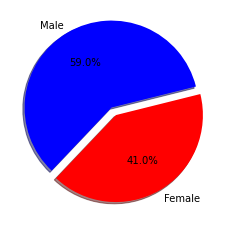

In [6]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=14)

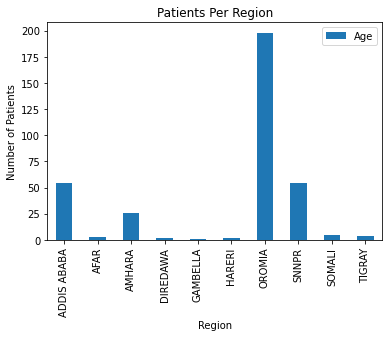

<Figure size 432x288 with 0 Axes>

In [7]:
# Create an array that contains the number of patients each region has
patients_per_region_df = pd.DataFrame(renamed_df.groupby('Region')['Age'].count())
patients_chart = patients_per_region_df.plot(kind= 'bar', title= 'Patients Per Region')
patients_chart.set_xlabel('Region')
patients_chart.set_ylabel('Number of Patients')
plt.show()
plt.tight_layout()



<AxesSubplot:xlabel='Age'>

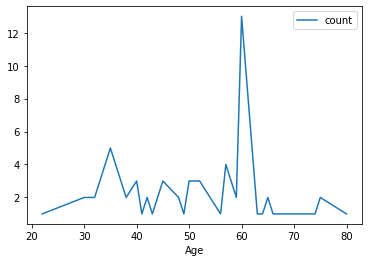

In [8]:
# Age of patients vs time of death
death_patients = renamed_df[renamed_df['Date of Death'].notna()]
#death_patients_group = death_patients.groupby('Age').count()
death_patients_group = death_patients.groupby('Age').agg(count = ('Sex','count'))
death_patients_group.plot()

#x_axis = (0, 5,)
#x_axis
#death_patients_group

In [91]:
# Age of patients vs time of death

death_patients_series = renamed_df[renamed_df['Date of Death'].notna()]
death_patients_series.reset_index(inplace=True)
death_patients = death_patients_series.values.tolist()
death_patients
deltas = []
for death_patient in death_patients:
    # Getting diagnosis Date
    date1= death_patient[1]
    # Getting Date of Death
    date2= death_patient[19]
    dxdate = ''
    if (date1 != ' '):
        dxdate = datetime.datetime.strptime(date1, "%m/%d/%Y").date()
    ddate = ''
    if (date2 != ' '):
        ddate = datetime.datetime.strptime(date2, "%m/%d/%Y").date()
    #print(mdate1)
    #print(rdate2)
    delta = ''
    if (ddate != ''):
        delta =  (ddate - dxdate).days
    #print(delta)
    deltas.append(delta)
#print(deltas)
death_patients_series['Days to Death'] = deltas
death_patients_series.head()

/var/folders/zs/dp2k58_n2cq47dtnqh4ng2_dz5pr_8/T/ipykernel_75546/3898946914.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_patients_series['Days to Death'] = deltas


,index,Diagnosis Date,Age,Sex,Region,Alcohol,Khat,Tobacco,Weight Loss,Duration,...,CT Scan,Histologic Grade,Distant Metastasis,Vomiting,Heart Burn,Cough,Chest Pain,Barium Swallow,Date of Death,Days to Death
0,0,12/14/2010,66,1,OROMIA,2,2,2,2,3,...,1,1,4,2,2,2,2,1,4/23/2011,130
1,13,6/28/2010,75,1,ADDIS ABABA,2,2,2,2,3,...,2,5,4,2,2,2,2,1,9/27/2010,91
2,17,8/20/2010,60,1,OROMIA,2,2,2,2,4,...,1,5,1,2,2,2,2,1,11/21/2010,93
3,21,10/25/2010,63,2,AMHARA,1,2,2,1,4,...,2,5,4,1,2,2,2,1,2/24/2012,487
4,24,12/14/2010,75,2,OROMIA,2,2,2,1,6,...,2,1,1,2,2,2,2,1,8/21/2013,981


The r-squared is: 0.004786529635459788


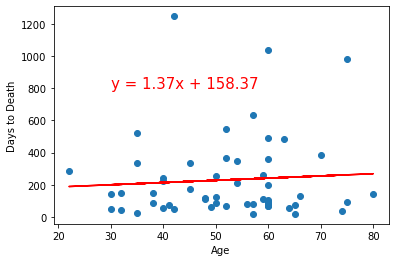

In [98]:
# Plot the number of days from diagnosis to death and Age
from scipy.stats import linregress
death_patients_df = pd.DataFrame(death_patients_series)
death_patients_df

death_patients_df['Days to Death'] = pd.to_numeric(death_patients_df['Days to Death'])
#death_patients_group = death_patients_df.groupby('Days to Death').count()
#death_patients_group
#death_patients_df.plot(kind="scatter", x="Days to Death", y="Age", grid=True, figsize=(8,8),
#              title="Days to Death vs Age")
#plt.show()
death_patients_df.dropna(inplace=True)

death_patients_df

x_values = death_patients_df['Age']
y_values = death_patients_df['Days to Death']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,800),fontsize=15,color="red")
plt.xlabel('Age')
plt.ylabel('Days to Death')
print(f"The r-squared is: {rvalue**2}")
plt.show()


<AxesSubplot:xlabel='Days to Death'>

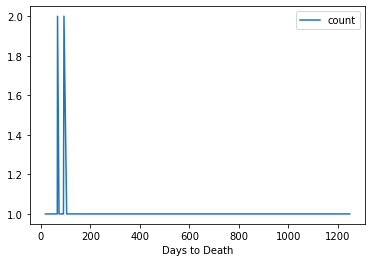

In [99]:
# Plot the number of days from diagnosis to death and number of patients
death_patients_group = death_patients_df.groupby('Days to Death').agg(count = ('Age','count'))
death_patients_group.plot()

([<matplotlib.patches.Wedge at 0x7f875c96a1f0>,
 [Text(0.33076479098047307, 1.1535140454487949, 'Alcohol'),
  Text(-1.0573878891885933, 0.30320100889886764, 'Tobacco'),
  Text(0.26611418508983853, -1.067325273988193, 'Khat')],
 [Text(0.19294612807194259, 0.6728831931784636, '33.3%'),
  Text(-0.5767570304665054, 0.16538236849029142, '16.7%'),
  Text(0.14515319186718462, -0.5821774221753779, '50.0%')])

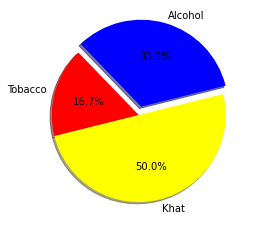

In [102]:
# Labels for the sections of our pie chart
labels = ["Alcohol", "Tobacco", "Khat"]

# The values of each section of the pie chart
addictions_count = [death_patients_df['Alcohol'].tolist().count(1), death_patients_df['Tobacco'].tolist().count(1), death_patients_df['Khat'].tolist().count(1)]

# The colors of each section of the pie chart
colors = ["blue", "red", "yellow"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0)
plt.pie(addictions_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=14)

In [103]:
average = death_patients_df["Age"].mean()
average

52.054545454545455

In [105]:
#Research about Khat based on the results: Khay is known for causing gastric disorders, and the data we worked in is 
#focused on esophageal cancer
death_patients_khat_df = death_patients_df.loc[death_patients_df['Khat'] == 1]
death_patients_khat_df



,index,Diagnosis Date,Age,Sex,Region,Alcohol,Khat,Tobacco,Weight Loss,Duration,...,CT Scan,Histologic Grade,Distant Metastasis,Vomiting,Heart Burn,Cough,Chest Pain,Barium Swallow,Date of Death,Days to Death
7,50,4/19/2011,32,1,SNNPR,2,1,2,2,3,...,1,1,1,2,2,2,2,1,5/30/2011,41.0
8,62,6/8/2011,35,1,AMHARA,2,1,2,2,12,...,2,5,4,2,2,2,2,1,7/4/2011,26.0
16,126,7/25/2012,45,2,SNNPR,2,1,2,1,12,...,2,5,4,1,2,2,2,1,6/26/2013,336.0
17,138,9/17/2012,52,2,OROMIA,2,1,2,1,6,...,2,2,4,2,2,2,2,2,9/18/2013,366.0
18,147,5/6/2013,59,2,SNNPR,2,1,2,2,4,...,2,2,4,2,2,2,2,1,1/20/2014,259.0
21,167,4/4/2013,60,1,OROMIA,2,1,2,2,6,...,2,5,4,2,2,2,2,1,7/17/2013,104.0
29,201,12/23/2013,38,1,OROMIA,2,1,2,1,3,...,2,5,3,1,2,2,2,1,3/21/2014,88.0
30,205,3/20/2014,57,1,OROMIA,2,1,2,2,12,...,2,5,1,2,2,2,2,2,6/10/2014,82.0
34,225,9/1/2014,45,2,OROMIA,2,1,1,1,4,...,1,5,1,2,2,2,2,1,2/20/2015,172.0
35,233,9/26/2014,50,2,OROMIA,2,1,2,1,6,...,1,5,2,2,2,2,2,1,1/30/2015,126.0


([<matplotlib.patches.Wedge at 0x7f875cbe8e20>,
 [Text(-0.4104242705288181, 1.1276311090781808, 'Male'),
  Text(0.3762223447631546, -1.033661814763859, 'Female')],
 [Text(-0.23941415780847722, 0.6577848136289386, '53.3%'),
  Text(0.20521218805262975, -0.5638155353257412, '46.7%')])

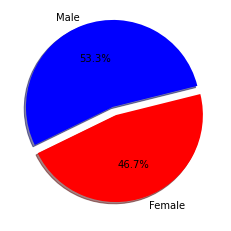

In [106]:
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
gender_count = [death_patients_khat_df['Sex'].tolist().count(1), death_patients_khat_df['Sex'].tolist().count(2)]

# The colors of each section of the pie chart
colors = ["blue", "red"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=14)